# Sketch Classification

The sketch data is fetched from "Quick Draw!", a project by Google. The dataset contain Numpy Bitmap files (.npy) and is downloaded from [Google Cloud Platform](https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap). These sketches are already simplified (removed timestamp data, etc.) and scaled to 28x28 greyscale bitmap.

In this notebook, the focus will be on five sketch categories:
- Cat 
- Dog
- Flower
- House 
- Sun

## Load dataset
Loading dataset from local folder. The *load_sketches* returns shuffled data with labels, splitted for training and test.

In [1]:
import load_sketches as ld
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
train_set, test_set, train_labels, test_labels, label_strings = ld.load_sketches(0.9,"sketches/")

A sketch could look like this:


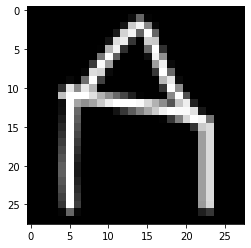

In [3]:
print("A sketch could look like this:")
pic = np.reshape(train_set[0], (28,28))

plt.imshow(pic, cmap="gray")
plt.show()

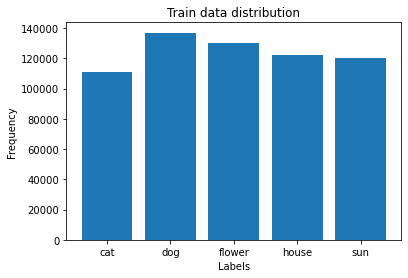

In [4]:
freq = [0 for i in range(5)]
for i in range(len(train_labels)):
    freq[train_labels[i]] += 1

f, ax = plt.subplots()
plt.bar(range(5), freq)
plt.title("Train data distribution")
plt.xlabel("Labels")
plt.ylabel("Frequency")
ax.set_xticks(range(5))
ax.set_xticklabels(label_strings)
plt.show()


## Set up model
This is the best model so far.

In [5]:
# Model definition
model = Sequential()
model.add(Conv2D(20, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(40, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.7))
model.add(Flatten())
model.add(Dense(700, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(350, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [6]:
model.compile(optimizer=SGD(lr=0.001, momentum=0.8, decay=1e-6), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Train model

In [7]:
early_stop = EarlyStopping(monitor="val_loss",
                           min_delta=0,
                           patience=2,
                           verbose=0,
                           mode="auto",
                           baseline=None,
                           restore_best_weights=True)

In [8]:
# Trains the model and saves the history of the training
history = model.fit(train_set, train_labels, batch_size=200, epochs=1, validation_split=0.3, callbacks=[early_stop])

model.summary()

ValueError: in user code:

    C:\Users\jon18\anaconda3\envs\sketchenv\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\jon18\anaconda3\envs\sketchenv\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\jon18\anaconda3\envs\sketchenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\jon18\anaconda3\envs\sketchenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\jon18\anaconda3\envs\sketchenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\jon18\anaconda3\envs\sketchenv\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\jon18\anaconda3\envs\sketchenv\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\jon18\anaconda3\envs\sketchenv\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\jon18\anaconda3\envs\sketchenv\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, 784]


## Save model

In [ ]:
model.save()